In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
eth_prices = pd.read_csv('ETH-USD.csv')
eth_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/01/16,0.9488,0.9488,0.9184,0.9200,0.9200,43
1,02/01/16,0.9200,0.9547,0.9200,0.9547,0.9547,68
2,03/01/16,0.9547,0.9700,0.9506,0.9600,0.9600,485
3,04/01/16,0.9600,0.9644,0.9186,0.9500,0.9500,787
4,05/01/16,0.9500,0.9599,0.9409,0.9426,0.9426,735


In [3]:
ethereum = pd.read_csv('googletrends-ethereum.csv')

ethereum.head()

,Week,ethereum
0,03/01/16,1
1,10/01/16,1
2,17/01/16,1
3,24/01/16,2
4,31/01/16,1


In [4]:
weekly_price = []

for week in ethereum['Week']:
    w = eth_prices.loc[eth_prices['Date'] == week]
    price = w['High'].values
    if len(price) == 0:
        weekly_price.append(np.nan)
    else:
        weekly_price.append(price[0])

In [5]:
ethereum['Price'] = weekly_price

In [6]:
ethereum

,Week,ethereum,Price
0,03/01/16,1,0.970000
1,10/01/16,1,1.000000
2,17/01/16,1,1.310000
3,24/01/16,2,2.300000
4,31/01/16,1,2.540000
5,07/02/16,3,3.000000
6,14/02/16,2,5.410000
7,21/02/16,2,4.630000
8,28/02/16,4,6.540000
9,06/03/16,4,11.900000


In [7]:
# Drop weeks for which there are missing values 
ethereum = ethereum.dropna(axis=0, how='any')

In [8]:
data = ethereum[['ethereum','Price']].values

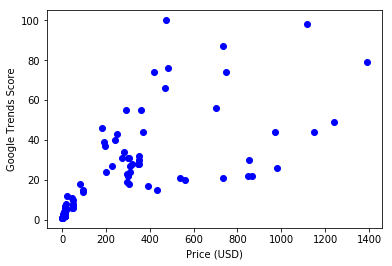

In [16]:
plt.plot(data[:,1],data[:,0], "bo")
plt.xlabel('Price (USD)')
plt.ylabel('Google Trends Score')
plt.show()

In [17]:
# Normalize the data
X = (data[:,1] - np.mean(data[:,1]))/np.std(data[:, 1])
Y = (data[:,0] - np.mean(data[:,0]))/np.std(data[:, 0])

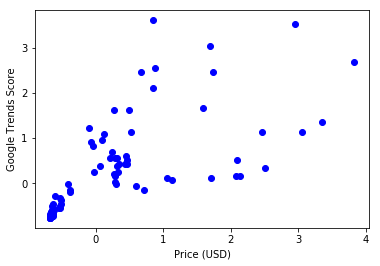

In [18]:
plt.plot(X,Y, "bo")
plt.xlabel('Price (USD)')
plt.ylabel('Google Trends Score')
plt.show()

In [19]:
def simplest_neural_net(x, y, epochs, learning_rate):
    weights = np.array([0, 0])
    bias = 1.
    for e in range(epochs):
        gradient = np.array([0., 0.])
        for i in range(len(x)):
            xi = x[i]
            xi = np.array([bias, xi])
            yi = y[i]
            
            h = np.dot(weights, xi) - yi
            gradient += 2*xi*h
        
        weights = weights - learning_rate*gradient
    return weights[1], weights[0]

In [20]:
# Here the ideal values for slope and y-intercept are converged upon
m, b = simplest_neural_net(X,Y,100, 1e-3)
target_m = m
target_b = b

In [21]:
x_points = np.linspace(np.min(X), np.max(X), 10)
line = b + m*x_points

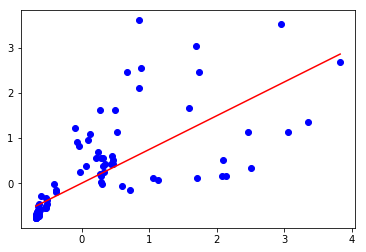

In [22]:
plt.plot(X,Y, 'bo', x_points, line, 'r-')
plt.show()


In [ ]:
# Optimizing the learning rate